<div align=center>
		
<p></p>
<p></p>
<font size=5>
In the Name of God
<font/>
<p></p>
 <br/>
    <br/>
    <br/>
<font color=#FF7500>
Sharif University of Technology - Departmenet of Computer Engineering
</font>
<p></p>
<font color=blue>
Artifical Intelligence - Dr. Mohammad Hossein Rohban
</font>
<br/>
<br/>
Fall 2021

</div>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
Practical Assignment 1
            	<br/>
			</font>
    <br/>
    <br/>
<font size=4>
			<br/><br/>
Deadline:  Aban 6th
                <br/><b>
              Cheating is Strongly Prohibited
                </b><br/><br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

# Personal Data

In [1]:
# Set your student number
student_number = 98105879
Name = 'Ali'
Last_Name = 'Abbasi'

# Rules
- You are not allowed to add or remove cells. You **must use the provided space to write your code**. If you don't follow this rule, **your Practical Assignment won't be graded**. 
- There is one cell for your custom functions (if you need any) at the beginning of each question. Please note that this jupyter file might be broken down into 3 or 4 jupyter notebooks for easier grading, so you **must write your custom functions in the correct cell**.
- By running the cell below, you can see if your jupyter file is accepted or not. This cell will also **generate a python file which you'll have to upload to Quera** (as well as your jupyter file). The python file will later be validated and if the code in both files doesn't match, **your Practical Assignment won't be graded**.
- This assignment is due Aban 6th 23:59:59. you can use up to 7 grace days for this assignment and the hard deadline is Aban 13th 23:59:59.

In [54]:
# remember to save your jupyter file before running this script
from Helper_codes.validator import *

python_code = extract_python("./questions.ipynb")
with open(f'python_code_{student_number}.py', 'w') as file:
    file.write(python_code)

your jupyter file will be graded


# Q1 (20 Points)

<font size=4>
Author: Amin Meghrazi
			<br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

In [40]:
import heapq
from math import inf


def add_neighbors(roads, floristries, fringe, costs, pos1, pos2, flowers, node_cost):
    # move brother 1
    if pos1 in roads:
        for dest, road_cost in roads[pos1]:
            fringe.append(make_state(dest, pos2, flowers.union(floristries[dest - 1])))
            costs.append((node_cost[0] + road_cost, node_cost[1]))

    # move brother 2
    if pos2 in roads:
        for dest, road_cost in roads[pos2]:
            fringe.append(make_state(pos1, dest, flowers.union(floristries[dest - 1])))
            costs.append((node_cost[0], node_cost[1] + road_cost))


def graph_search(roads: dict, floristries, n, k):
    fringe = [make_state(1, 1, frozenset(floristries[0]))]
    costs = [(0, 0)]
    closed = set()
    min_cost = inf
    while True:
        if fringe:
            node = fringe.pop(0)
            node_cost = costs.pop(0)
            if node not in closed:
                if goal_test(node, n, k):
                    min_cost = min(min_cost, max(node_cost))

                closed.add(node)
                pos1, pos2, flowers = node
                add_neighbors(roads, floristries, fringe, costs, pos1, pos2, flowers, node_cost)
        else:
            return min_cost


def make_state(pos1, pos2, flowers: frozenset):
    return pos1, pos2, flowers


def goal_test(state: tuple, n, k):
    pos1, pos2, flowers = state
    return pos1 == pos2 == n and len(flowers) == k

Amsterdam is a city with a large variety of flowers with several florists connected by bidirectional roads, each of which has a travel time. Each of the floristry may sell one or more kinds of flowers. Frank and Gorgi are brothers, and their mother is under a spell that will be broken by a bouquet of **k** different flower that **k** is the number of all types of flowers which are available in florists Amsterdam.

At first, Frank and Gorgi are at floristry 1 (each of the florists is numbered consecutively from 1 to **n**), and according to the situation, they should collect all types of flowers, and in order to save time, they will divide the list of flowers between them. Determine the total travel time for the boys to purchase all types of flowers, finally meeting at floristry **n**. Their paths may intersect, they may backtrack through floristry **n**, and one may arrive at a different time than the other. The minimum time to determine is when both have arrived at the destination.

For example,  there are **n = 5** florists selling **k = 3** types of flowers. The following graph shows a possible layout of the florists connected by **m = 5** paths. Each of nodes is labeled **floristry number / flower types offered / boy(s) that visit(s)**. Here **F** and **G** represent Frank and Gorgi, respectively. In this example, both of boys take the same path, i.e. **1 &#8594; 3 &#8594; 5** and arrive at time **15 + 5 = 20** having purchased all three types of flowers. Neither of them visits floristry **2** or **4**. <br/>
<img src="Images/Blank_diagram.png" width="400"/>

## Input Format

The first line contains 3 space-seperated integers: <br/>
**n**(the number of floristries in Amsterdam), **m**(the number of roads), and **k**(the number of flower types sold in Amsterdam), respectively.<br/>
Each line **i** of the **n** subsequent lines ($1 \leq i \leq n$) describes a floristry as a line of space separated integers. Each line takes the following form: <br/>
   * The first integer, $t_i$, denotes the number of flower types that are sold at floristry **i**.
   * Each of the $t_i$ subsequent integers on the line describes a type of flower sold at floristry **i**, denoted by $S_{ij}$, where $1 \leq j \leq t_i$

Each line **z** of the **m** subsequent lines ($1 \leq j \leq m$) contains 3 space-separated integers that describe a road. The first two integers, $u_z$ and $v_z$, describe the two florists it connects. The third integer, $w_z$, denotes the amount of time it takes to travel the road.

## Constraints

* $ 2 \leq n \leq 10^3 $
* $ 1 \leq m \leq 2 \times 10^3 $
* $ 1 \leq k \leq 10 $
* $ 0 \leq t_i \leq k $
* $ 1 \leq S_{ij} \leq k $
* All $S_{ij}$ are different for every fixed *i*
* $ 1 \leq u_z , v_z \leq n $
* $ 1 \leq w_z \leq 10^4 $
* Each road connects 2 distinct florists.
* Each pair of florists is directly connected by no more than 1 road.
* It's possible to get to any floristry from any other florist.
* Each type of flower is always sold by at least one florist.

## Output Format

Print the minimum amount of time it'll take for the boys to collectively purchase all **k** types of flowers and meet up at florist **n**.

## Sample Input

5 5 5 <br/>
1 1 <br/>
1 2 <br/>
1 3 <br/>
1 4 <br/>
1 5 <br/>
1 2 10 <br/>
1 3 10 <br/>
2 4 10 <br/>
3 5 10 <br/>
4 5 10

## Sample Output

30

## Explanation

<img src="Images/diagram2.png" width="400"/>
<br/>
Frank can travel $1 \rightarrow 2 \rightarrow 4 \rightarrow 5$ and buy flower at all of the florists on his way. <br/>
Gorgi can travel $1 \rightarrow 3 \rightarrow 5$, and buy flower from the third florists only.

Now, You should implement the function **solve**.
<br/> At last, Pay Attention that you have a **time limit of 9s** for each test that if your code exceeds that limit for any of these tests, you'll get **FAIL** for that test.

In [41]:
def solve(N, M, K, NUMS, roads):
    floristries = []  # todo
    for flower_list in NUMS:
        flower_list.pop(0)
        floristries.append(flower_list)

    graph = {}
    for origin, dest, cost in roads:
        neighbors = graph.get(origin, [])
        neighbors.append((dest, cost))
        graph[origin] = neighbors

        neighbors = graph.get(dest, [])
        neighbors.append((origin, cost))
        graph[dest] = neighbors

    return graph_search(graph, floristries, N, K)

## Grading

By Running the below cell, you'd test your code with 10 test cases we gave to you, But be aware that there are more tests that will determine your grade in addition to these ten tests.

In [42]:
import time

pass_count = 0
test_count = 10
Time_Limit = 9
for i in range(test_count):
    print("Test", (i + 1))
    file_in_name = "In" + str(i + 1)
    file_out_name = "Out" + str(i + 1)
    f = open("Inputs/" + file_in_name + ".txt", 'r')
    N, M, K = map(int, f.readline().split())
    NUMS = []
    roads = []
    for i in range(N):
        nums = list(map(int, f.readline().split()))
        NUMS.append(nums)
    for i in range(M):
        road = list(map(int, f.readline().split()))
        roads.append(road)
    start_time = time.time()
    result = solve(N, M, K, NUMS, roads)
    end_time = time.time()
    f_out = open("Outputs/" + file_out_name + ".txt", 'r')
    true_output = int(f_out.read())
    if result == true_output and Time_Limit >= end_time - start_time:
        print("PASS.", "Your answer which is True: ", result, ". Time consumed: ", end_time - start_time, "s")
        pass_count += 1
    else:
        print("FAIL!", "your minimum time: ", result, "True answer: ", true_output, ". Time consumed: ", end_time - start_time, "s")
        
print("Percentage of success: ", (pass_count / test_count) * 100)

Test 1
PASS. Your answer which is True:  30 . Time consumed:  0.0009984970092773438 s
Test 2
FAIL! your minimum time:  927 True answer:  792 . Time consumed:  0.0 s
Test 3
PASS. Your answer which is True:  2989 . Time consumed:  0.0 s
Test 4
PASS. Your answer which is True:  207 . Time consumed:  0.0019941329956054688 s
Test 5
PASS. Your answer which is True:  3299 . Time consumed:  0.0 s
Test 6
PASS. Your answer which is True:  1571 . Time consumed:  0.0009970664978027344 s
Test 7


KeyboardInterrupt: 

# Q2 (20 Points)

<font size=4>
Author: Amin Meghrazi
			<br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

In [5]:
# place for your custom functions for Q2 here
import time

In this Problem, We want to use A* algorithm to present a solution for an interesting game that we called it, Push Till Redemption. :) <br/>
First, we introduce you to some major features of this game. <br/>

In this game, we have a map with **M** $\times$ **N** dimensions covered by a one-layer wall. i.e., The **M-2** $\times$ **N-2** rectangle in the middle is our usable map. <br/>
There are some boxes whose primary coordinates are specified at the start point, and also There are some specified cells which we call storage, and the most important thing is that we have an agent in this game that should push the boxes to locate them in the storage cells. In the general format of the game, each box can be placed in each storage, but sometimes our boxes may have restrictions. i.e., A specified box must be placed at specified storage. <br/>
And the last feature of this game is its obstacles; We may have some fixed obstacles in some cells of the map, which our agent can't move to cells grides and obviously can't push the boxes to those cells too..

For better inrtoduction, take a look at these two pictures. <br/>
  <img src="Images/map1.png" alt="example1" style="float: left; margin-left: 120px; width:200px;height:300px;"/>
  <img src="Images/map2.png"  style="float: left; margin-left: 250px; width:200px;height:300px;"/>

First, we should introduce symbols used in maps, In this Game, We use **#** for walls and obstacles, $*$ for boxes, **?** for the location of the agent, **-** for storage cell, and if our map had some restrictions, we highlight both the box and its corresponding storage cell with the same color. <br/>

For more clarification, we give an example for defining the state of the game at the start point. Pay attention that this example corresponds to the left map. <br/>
**An important point about defining state in this game is that we ignore border wall (i.e., two columns and two rows) in our input dimensions or coordinates.** <br/>
Don't worry if you don't understand the meaning of some of these inputs or have some questions about them; They're completely explained if they were needed.

State("START", 0, None, 4, 4,  # dimensions <br/>
&nbsp;&nbsp;&nbsp;                (0, 3),  # agent <br/>
&nbsp;&nbsp;&nbsp;                {(1, 2): 0, (1, 1): 1},  # boxes <br/>
&nbsp;&nbsp;&nbsp;                {(2, 1): 0, (2, 2): 1},  # storage <br/>
&nbsp;&nbsp;&nbsp;                frozenset(((0, 0), (1, 0), (3, 3))),  # obstacles <br/>
&nbsp;&nbsp;&nbsp;                (frozenset(((2, 1),)), frozenset(((2, 2),))),  # restrictions, <br/>
&nbsp;&nbsp;&nbsp;                {0: 'cyan', 1: 'magenta'},  # box colours <br/>
&nbsp;&nbsp;&nbsp;                {0: 'cyan', 1: 'magenta'}  # storage colours <br/>
&nbsp;&nbsp;&nbsp;                )

You should implement an A* algorithm to solve this search problem and win the game in this question.

In this problem, we provide you with some of the files to complete the functionality of the game, which you can check out as you want to know more about this game and its properties. Still, for completing this task properly, It's not necessary to check them out, and this jupyter file contains sufficient description. Besides, We provide you with some of the functions to solve the problem. Some of them are complete, but some are incomplete, and you should complete them.

## Prerequisites

In [6]:
import numpy as np
import math
from Helper_codes.search import *
from Helper_codes.sokoban import PROBLEMS, sokoban_goal_state

## Heuristics

In this section, we want to investigate three different heuristics. So we explain all requirements, and you should implement these heuristics. <br/>
These functions should take a game state and Return a numeric value that serves as an estimate of the state's distance to the goal. <br/>
Each state has components like **boxes** and **storage**. <br/>
**boxes:** A dictionary where the keys are the coordinates of each box, and the values are the index of that box which is equal to the index of that box's list of restrictions if it has restrictions. <br/>
**storage:** A dictionary where the keys are the coordinates of each storage point, and the values are the index of that storage point.

### A. Displaced Boxes

This heuristic is trivial and, of course, admissible. <br/>

In [7]:
def heur_displaced(state):
    return len(set(state.boxes.keys()).difference(state.storage.keys()))

Each state has a component named **restrictions**, a tuple of frozensets of valid storage coordinates for each box. **None** means that all storage locations are valid for each box. Also we know that index of each frozenset in this tuple (**state.restrictions**), is the value of corresponding **box** in dictionary of **state.boxes** . I recommend taking another look at the sample of states defining above.

Now with these explanations, you should implement Manhattan Distance and Euclidean Distance Heuristics.

### B. Manhattan Distance

In [8]:
def heur_manhattan_distance(state):
    heu = 0
    for i, box in enumerate(state.boxes):
        if state.restrictions and state.restrictions[i]:
            valid_storages = state.restrictions[i]
        else:
            valid_storages = state.storage
        min_dist = math.inf
        box_x, box_y = box
        for storage_x, storage_y in valid_storages:
            manhattan = abs(storage_x-box_x) + abs(storage_y-box_y)
            min_dist = min(min_dist, manhattan)
        heu += min_dist
    return heu

### C. Euclidean Distance

In [9]:
def heur_euclidean_distance(state):  
    heu = 0
    for i, box in enumerate(state.boxes):
        if state.restrictions and state.restrictions[i]:
            valid_storages = state.restrictions[i]
        else:
            valid_storages = state.storage
        min_dist = math.inf
        for storage_coordinate in valid_storages:
            manhattan = math.dist(box, storage_coordinate)
            min_dist = min(min_dist, manhattan)
        heu += min_dist
    return heu

## Testing Heuristics

In the given files, The common version of A* algorithm is available. By running the cells below, you could see the game's result for some different game states, which are ready for you through **PROBLEMS** and actually for different kinds of heuristics.

In [10]:
def common_astar(heur_func, P_flag):    
    solved = 0
    unsolved = []
    counter = 0
    percent = 0
    print_path = P_flag
    timebound = 2  # 2 second time limit for each problem
    print("*************************************")
    print("Running A-star with" + str(heur_func) + "Heuristic")

    for i in range(0, 10):  # note that there are 40 problems in the set that has been provided.  We just run through 10 here for illustration.
        print("*************************************")
        print("PROBLEM {}".format(i))

        s0 = PROBLEMS[i]  # Problems will get harder as i gets bigger

        se = SearchEngine('astar', 'full')
        se.init_search(s0, goal_fn=sokoban_goal_state, heur_fn=heur_func)
        final = se.search(timebound)
        
        if final:
            solved += 1
            if print_path:
                final.print_path()
            
        else:
            unsolved.append(i)
        counter += 1

    if counter > 0:
        percent = (solved / counter) * 100

    print("*************************************")
    print("{} of {} problems ({} %) solved in less than {} seconds.".format(solved, counter, percent, timebound))
    print("Problems that remain unsolved in the set are Problems: {}".format(unsolved))
    print("*************************************")

Notice that the **common_astart** function get two inputs, one for determining the heuristic function and another boolean input, determines whether the final path of the solution needs to be drawn or not, So if you want to check the steps of the game, you should change that field to **True**.

In [11]:
common_astar(heur_displaced, False)

*************************************
Running A-star with<function heur_displaced at 0x0000013B36F9C820>Heuristic
*************************************
PROBLEM 0
Solution Found with cost of 23 in search time of 0.03125 sec
Nodes expanded = 2344, states generated = 5790, states cycle check pruned = 3446, states cost bound pruned = 0
*************************************
PROBLEM 1
Solution Found with cost of 35 in search time of 0.15625 sec
Nodes expanded = 9510, states generated = 22322, states cycle check pruned = 12812, states cost bound pruned = 0
*************************************
PROBLEM 2
Solution Found with cost of 27 in search time of 0.21875 sec
Nodes expanded = 11134, states generated = 27805, states cycle check pruned = 16671, states cost bound pruned = 0
*************************************
PROBLEM 3
Solution Found with cost of 20 in search time of 0.28125 sec
Nodes expanded = 16990, states generated = 34778, states cycle check pruned = 17788, states cost bound pruned = 

In [12]:
common_astar(heur_manhattan_distance, False)

*************************************
Running A-star with<function heur_manhattan_distance at 0x0000013B36F9C8B0>Heuristic
*************************************
PROBLEM 0
Solution Found with cost of 23 in search time of 0.046875 sec
Nodes expanded = 2358, states generated = 5684, states cycle check pruned = 3326, states cost bound pruned = 0
*************************************
PROBLEM 1
Solution Found with cost of 35 in search time of 0.390625 sec
Nodes expanded = 10230, states generated = 23590, states cycle check pruned = 13360, states cost bound pruned = 0
*************************************
PROBLEM 2
Solution Found with cost of 27 in search time of 0.171875 sec
Nodes expanded = 8910, states generated = 21090, states cycle check pruned = 12180, states cost bound pruned = 0
*************************************
PROBLEM 3
Solution Found with cost of 20 in search time of 0.171875 sec
Nodes expanded = 8876, states generated = 18584, states cycle check pruned = 9708, states cost boun

In [13]:
common_astar(heur_euclidean_distance, False)

*************************************
Running A-star with<function heur_euclidean_distance at 0x0000013B36F9CC10>Heuristic
*************************************
PROBLEM 0
Solution Found with cost of 23 in search time of 0.046875 sec
Nodes expanded = 2403, states generated = 5924, states cycle check pruned = 3521, states cost bound pruned = 0
*************************************
PROBLEM 1
Solution Found with cost of 35 in search time of 0.1875 sec
Nodes expanded = 10639, states generated = 24532, states cycle check pruned = 13893, states cost bound pruned = 0
*************************************
PROBLEM 2
Solution Found with cost of 27 in search time of 0.203125 sec
Nodes expanded = 9801, states generated = 23911, states cycle check pruned = 14110, states cost bound pruned = 0
*************************************
PROBLEM 3
Solution Found with cost of 20 in search time of 0.515625 sec
Nodes expanded = 14021, states generated = 29041, states cycle check pruned = 15020, states cost boun

Now that you have seen how your three heuristics perform in action, Please compare these three different heuristic functions from various aspects like **Search Time, Expanded Nodes, etc.** <br/>
I want you to feel free about this comparison and act as you like. For example, you can just explain your points of view in the below cell or compare the performance of these three heuristic functions with some kind of charts or graphs and explain a little about your deduction. (There's no restriction about the type of charts or graphs).

In [ ]:
# in case you want to draw charts for your explanation

<font color=blue>
    (3 Points) <br/>
Your Explanation goes here....
</font>

## Anytime weighted A*

In this section, We want you to implement another A* algorithm which is named **anytime weighted A*** in this algorithm, and we take the initial state of the game, heuristic function, weight, and timebound as inputs which **weight** is the factor which determines the impact of heuristic in calculating f_value (g + w\*h) and **timebound** is the number of seconds that we have for running this algorithm. And Output of this function is a **goal state of search** (if a goal is found), else **FALSE**. <br/>
In this version of A*, we aim to find the optimal path and optimal goal. So while there is time, we call the search method of the search engine (**se**) and we look for a path with minimum cost and to save time, We use cost-bounder to prune states which have bigger f_value than the best path cost we found so far. Costbounder is a three tuple that is like (g_val, h_val, g_val + h_val) which each of these 3 are like limit for pruning successor state. Please pay attention that in this version, we prune only when the current final f is larger than best_path_cost<br/>
As you can see in the function below, first we save the f_value function, which is affected by weight, into **wrapped_fval_function** then we make a search engine and call its **init_search**. <br/>
For calculating goal value to compare with best path cost that was found, We use **final.gval + heur_fn(final)** which **final** is the goal state in case is found.

In [14]:
def fval_function(sN, weight):
    """
    Provide a custom formula for f-value computation for Anytime Weighted A star.
    Returns the fval of the state contained in the sNode.

    @param sNode sN: A search node (containing a SokobanState)
    @param float weight: Weight given by Anytime Weighted A star
    @rtype: float
    """

    return sN.gval + weight * sN.hval

In [55]:
def anytime_weighted_astar(initial_state, heur_fn, weight=1., timebound=10):
    # initialization
    best_path_cost = float("inf")
    time_remain = 8
    iter = 0
    optimal_final = None
    cost_bound = math.inf, math.inf, math.inf

    wrapped_fval_function = (lambda sN: fval_function(sN, weight))
    se = SearchEngine('custom', 'full')
    se.init_search(initial_state, sokoban_goal_state, heur_fn, wrapped_fval_function)

    while (time_remain > 0) and not se.open.empty():
        start_time = time.time()        
        final = se.search(timebound=time_remain, costbound=cost_bound)
        if final:
            cost_bound = final.gval, final.gval, final.gval
            if final.gval < best_path_cost:
                best_path_cost = final.gval
                optimal_final = final
            end_time = time.time()
            time_remain -= end_time - start_time
        else:
            break
        
    try:
        return optimal_final
    except:
        return final

    return False

## Running the Game

In [51]:
def run_astar(P_flag):
    solved = 0
    unsolved = []
    counter = 0
    percent = 0
    print_path = P_flag
    timebound = 8  # 8 second time limit
    print("Running Anytime Weighted A-star")

    for i in range(0, 10):
        print("*************************************")
        print("PROBLEM {}".format(i))

        s0 = PROBLEMS[i]  # Problems get harder as i gets bigger
        weight = 10
        final = anytime_weighted_astar(s0, heur_fn=heur_displaced, weight=weight, timebound=timebound)

        if final:
            solved += 1
            if print_path:
                final.print_path()
        else:
            unsolved.append(i)
        counter += 1

    if counter > 0:
        percent = (solved / counter) * 100

    print("*************************************")
    print("{} of {} problems ({} %) solved in less than {} seconds.".format(solved, counter, percent, timebound))
    print("Problems that remain unsolved in the set are Problems: {}".format(unsolved))
    print("*************************************")

Notice that the **run_astart** function get one input which is boolean. It determines whether the solution's final path is drawn or not, So if you want to check the steps of the game, you should change that field to **True**.

In [52]:
run_astar(False)

Running Anytime Weighted A-star
*************************************
PROBLEM 0
Solution Found with cost of 23 in search time of 0.015625 sec
Nodes expanded = 1271, states generated = 2738, states cycle check pruned = 1467, states cost bound pruned = 0
Search Failed! No solution found.
Nodes expanded = 2409, states generated = 6152, states cycle check pruned = 3623, states cost bound pruned = 120
*************************************
PROBLEM 1
Solution Found with cost of 37 in search time of 0.171875 sec
Nodes expanded = 7971, states generated = 17752, states cycle check pruned = 9781, states cost bound pruned = 0
Solution Found with cost of 37 in search time of 0.0 sec
Nodes expanded = 8106, states generated = 18067, states cycle check pruned = 9949, states cost bound pruned = 12
Solution Found with cost of 37 in search time of 0.0 sec
Nodes expanded = 8226, states generated = 18348, states cycle check pruned = 10093, states cost bound pruned = 29
Solution Found with cost of 35 in sea

Compare these versions of the A* algorithm with the common version you knew before and mention its advantages.

In [ ]:
# in case you want to draw charts for your explanation

<font color=blue>
    (3 Points) <br/>
Your Explanation goes here....
</font>

# Q3 (25 Points)

<font size=4>
Authors: Amirmahdi Namjoo, Sajjad Faghfoor Maghrebi
			<br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

In [ ]:
# place for your custom functions for Q3 here

In This Problem, We want to investigate the minimum vertex cover problem. Informally, A vertex cover is a subset of vertices that cover all the edges. i.e., for each edge, there exists an endpoint in the vertex cover. A minimum vertex cover is a vertex cover with the least amount of vertices possible.


The Formal definition of the problem is as follows:
A vertex cover $V'$ of an undirected graph $G = (V,E)$ is a subset of $V$ such that for all edge $uv \in E \Rightarrow u \in V' \vee v \in V'$. The vertex cover with the smallest possible size is called the minimum vertex cover.

Minimum vertex cover is a famous NP-Hard optimization problem. It means that we currently don't have any polynomial-time algorithm for this problem, and we will most likely never have such an algorithm unless $P = NP$. Therefore it is reasonable to use optimization algorithms like local search to find an approximate but not necessarily perfect answer.

In this question and the next one, you should implement two different local search techniques to solve this problem: Simulated Annealing for this question and the Genetic Algorithm for the next one.

In this problem, we provide you some of the functions to solve the problem. Some of them are complete, but some are incomplete, and you should complete them.

## Libraries

In [18]:
import numpy as np
from math import exp
import random
import matplotlib.pyplot as plt
import math

## Graph Data
There is a file named **create_graph.py** beside this jupyter notebook. You can generate multiple types of networks by running the file using the syntax below. It is **not** mandatory and does not have any additional score. It is just for you to test your code to see whether it works or not.
```
python create_graph.py
```
Make sure that you have the dependencies installed, especially networkx version: 2.5.1+. You can use `pip`  to install the newest version of networkx using
```
pip install networkx
```
Also, you may want to change variables m2n and n in `create_graph.py`.

n is the number of nodes. m2n is roughly equal to the number of edges divided by the number of nodes.
 

## Reading graph data

We provide graph data in '.txt' files as an adjacency matrix. The first line indicates $n$, the number of vertices. The following $n$ lines each contain $n$ comma-separated numbers. Consider $d_{ij}$ to be the number in $i$th row and $j$th column. It is $1$ if and only if there is an edge between node $i$ and $j$, and $0$ otherwise. The function is provided completely for your comfort, and you don't need to change it.

In [19]:
"""
No need to change this cell. You can change "./Inputs/test-q3-q4.txt" to test different graphs.
"""

graph_matrix =[]
def load_data(path = "./Inputs/test-q3-q4.txt"):
    with  open(path , 'r') as f:
        lines = f.readlines()
        number_of_vertices = int(lines[0])
        for i in range(number_of_vertices):
            line_split = lines[i+1].split(',');
            graph_matrix.append([])
            for j in range(number_of_vertices):
                graph_matrix[i].append(int(line_split[j]))
load_data()

## Edge Count

Complete the following line to find out the number of graphs edges from its adjacency matrix. It can be done in one line using NumPy.

In [20]:
edge_count = np.count_nonzero(graph_matrix)
print(edge_count)

46382


## State

To use local search algorithms, we must define our state-space. As the problem is about choosing a vertex or not, we define each state as a vector $S$ of size $n$. 

$$
S_i=   \left\{
\begin{array}{ll}
      0 & \text{vertex $v_i$ is not in vertex cover} \\
      1 & \text{vertex $v_i$ is in vertex cover}
\end{array} 
\right.
$$

Write a function that generates a random state. i.e., it must return a boolean vector of size $n$.

In [21]:
def random_state_generator(n):
    return np.array(np.random.choice(a=[False, True], size=n))

We must also define the neighbor state. We can use multiple definitions for neighbor states, But here we use a simple one. Two states are neighbors if and only if they differ in just one element. Complete the following function, which gets a state and returns a new state by randomly choosing one element in the previous state and changing it from $0$ to $1$ or $1$ to $0$.

It is strongly recommended that you return the index of the changed element and its value, as you will likely need that later.

In [22]:
def neighbour_state_generator(state):
    new_state = state.copy()
    vertex_to_change = random.randint(0, len(new_state) - 1)
    previous_value = state[vertex_to_change]
    new_state[vertex_to_change] = ~previous_value
    return new_state, previous_value, vertex_to_change

## Cost Function

We must also define a cost function to evaluate each state. There are many ways to define a cost function for the vertex cover problem. Here we propose a cost function that works well with the problem. You could use other cost functions if you believe they work better. 

Our Proposed cost function is:

$C(s)=A*\sum_{i=1}^{n} s_{i}+ B*\sum_{i=1}^{n} \sum_{j=1}^{n} \mathrm{~d}_{i j} \overline{s_{i} \vee s_{j}}$

Here, $s_i$ is the $i\text{th}$ element of state vector. $\overline{s_{i} \vee s_{j}}$ is logical NOR of $v_i$ and $v_j$.

$A$ and $B$ are two arbitrary constants. Usually $A=1$ and $B=1$, but you could use other values.

Note that the formula above uses a 1-based index as a mathematical equation, but Python uses a 0-based index.

In [23]:
def cost_function(graph_matrix, state, A=1, B=1):
    return A * sum(state) + B * np.count_nonzero((np.dot(~np.array([state]).T, ~np.array([state]))) * graph_matrix)

## Simulated Annealing

Now comes the central part. Simulated annealing is somehow like normal hill-climbing, but with a small but significant change. In each iteration of Simulated Annealing, we calculate the cost of this new state after generating a neighbor state. If it is better than the current state, we accept it and use it as the new current state. But if it is worse than the current state, we calculate an acceptance probability and accept it based on this probability.

Usually, $P = e^{-\frac{\Delta C}{T}}$ is used for acceptance probability, in which $\Delta C$ is the cost difference between the new state and previous state. $T$ is a positive parameter called Temperature. At first, it is initialized based on the problem domain. After each iteration, it is multiplied by a factor of $\alpha<1$ to make it smaller. The point of using $T$ is to allow more random perturbations at the start of the algorithm to prevent getting stuck in a local extremum.

For the vertex cover problem, there exist better acceptance probability equations. We consider one here, but you are free to use other equation.




### Vertex Cover Probability Acceptance Equation

Let $s$ be current state and $s'$ be a neighbour state that has worse cost function that $s$. Also suppose that only $i$th element is different between $s$ and $s'$. For calculating acceptance probability of $s'$ we use this equation: 


$$p= \begin{cases}\mathrm{e}^{-\frac{\Delta F\left(1-D e g\left(s_{i}\right)\right)}{T}} & s_{i}=1 \\ \mathrm{e}^{-\frac{\Delta F\left(1+D e g\left(s_{i}\right)\right)}{T}} & s_{i}=0\end{cases}$$
in which
$$\operatorname{Deg}\left({i}\right)=\frac{\operatorname{Degree}(i)}{E d g e N u m}$$

Note that $Deg(s_i)$ is actually independent of state and can be calculated beforehand for each vertex.

Complete the line bellow the make an array named 'deg', in which $i$th element corresponds to $Deg(i)$

In [24]:
deg = [np.count_nonzero(x) / edge_count for x in graph_matrix]

Now complete the function 'prob_accept' that gets current and next state costs and other related information and returns the probability of acceptance of the next state.

In [25]:
def prob_accept(current_state, delta_cost, changed_vertex, t):
    term = 1 - deg[changed_vertex] if current_state[changed_vertex] else 1 + deg[changed_vertex]
    return exp(-delta_cost * term / t)

Now Implement a function called 'accept'. This function gets the current state and next state and other required parameters as input and outputs True or False to identify whether we should accept the next state or not.

In [26]:
def accept(current_state, next_state, changed_vertex, t):
    p = prob_accept(current_state, next_state, changed_vertex, t)
    return np.random.choice([True, False], p=[p, 1 - p])

Now Implement the main 'anneal' function that performs the algorithm. Try to experiment with different initial T and $alpha$ values to get the best result. Also, your function must implement these two stop criteria:

- If the number of iterations exceeded 'stopping_iter', stop.
- If the temperature drops below 'stopping_temprature', stop.

Also, the cost_list array is defined before the function. Append the cost of the best solution found after each iteration to this array. Also, print out the best solution and the best cost obtained.

In [27]:
cost_list = []


def anneal(
        graph_matrix, stopping_temperature=1e-8, stopping_iter=2000, alpha=0.99, T=50
):
    current = random_state_generator(len(graph_matrix))
    for i in range(stopping_iter):
        if T < stopping_temperature:
            break
        next, previous_value, changed_vertex = neighbour_state_generator(current)
        next_cost = cost_function(graph_matrix, next)
        current_cost = cost_function(graph_matrix, current)
        delta_cost = next_cost - current_cost
        if delta_cost < 0 or accept(current, delta_cost, changed_vertex, T):
            current = next
            cost_list.append(next_cost)
        else:
            cost_list.append(current_cost)
        T *= alpha

    best_solution = current
    best_cost = cost_list[-1]
    return best_solution, best_cost

In [28]:
best_sol_SA, best_cost_SA = anneal(
    graph_matrix,
)

In [29]:
best_sol_SA

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,

Plot the cost vs. iteration graph.

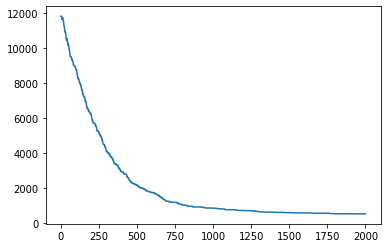

In [30]:
def plot_cost(cost_list):
    plt.plot(cost_list)
    plt.show()

plot_cost(cost_list)

# Q4 (25 Points)

<font size=4>
Authors: Amirmahdi Namjoo, Sajjad Faghfoor Maghrebi
			<br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

In [31]:
# place for your custom functions for Q4 here
import numpy as np
from math import exp
import random
import matplotlib.pyplot as plt
import math

def cost_function(graph_matrix, state, A=1, B=1):
    return A * sum(state) + B * np.count_nonzero((np.dot(~np.array([state]).T, ~np.array([state]))) * graph_matrix)

graph_matrix =[]
def load_data(path = "./Inputs/test-q3-q4.txt"):
    with  open(path , 'r') as f:
        lines = f.readlines()
        number_of_vertices = int(lines[0])
        for i in range(number_of_vertices):
            line_split = lines[i+1].split(',');
            graph_matrix.append([])
            for j in range(number_of_vertices):
                graph_matrix[i].append(int(line_split[j]))
load_data()

def calculate_costs(graph, population):
    costs = []
    for x in population:
        costs.append(cost_function2(graph, x))
    return costs

In this problem, we will tackle the vertex cover problem with a genetic algorithm. Cost function and state-space representation will be the same as the previous question. 

## Population Generation

The first step of the genetic algorithm is to generate an initial population of different states (chromosomes).

Complete the following function. It must generate a population of size $k$ for a graph with $n$ vertices.

In [32]:
def population_generation(n, k): 
    return np.array(np.random.choice(a=[False, True], size=(k, n)))

## Cost Function

For cost function, we use another, more simple formula for this problem. Because the Genetic algorithm tends to run much longer than simulated annealing, we prefer to use a more simple cost function for this problem.

The cost function for this problem is as follows:
- Add 1 to the cost for each vertex in the answer
- Add 5 (or any other number you prefer) to the cost for each edge that is not covered.

In [33]:
def cost_function2(graph, state):
    return cost_function(graph,state, A=1, B=5)

## Selection


We select the best chromosomes (states) in the selection phase and allow them to pass to the next generation (iteration). Others will be discarded.

For this part, we use a procedure named "tournament selection." In this procedure, we divide match each element in population with another one and compare their cost. The winner is the one that has a lower cost, and it gets selected for the next part, and the others are discarded.

In [34]:
def tournament_selection(graph, population, costs):
    middle = len(population) // 2
    for i in range(middle):
        if costs[middle + i] < costs[i]:
            population[i] = population[middle + i]
    return population

## Crossover

In the crossover phase, we combine two chromosomes to get a better chromosome (solution). There are lots of ways to implement crossover. For this problem, we propose this method:

Take two chromosomes as input. Generate a random 'index'. The resulting chromosome consists of genes from chromosome1 from 0 up until 'index' and genes from chromosome2 from 'index+1' until the end. Another chromosome is generated by swapping chromosome1 and chromosome2 and doint the same procedure. 

In [35]:
def crossover(graph, parent1, parent2):
    index = random.randint(0, len(parent1) - 1)
    child1 = np.concatenate([parent1[0:index + 1], parent2[index+1:]])
    child2 = np.concatenate([parent2[0:index + 1], parent1[index+1:]])
    return child1, child2

## Mutation

In the mutation part of this problem, we take chromosomes coming out of Crossover and change them slightly in the hope of getting better. There are many ways to implement mutation. We propose two methods here. You can implement each one of them or even both.

For this part, we generate a random number. If this number is greater than the mutation probability, we choose a random index in the chromosome and change it from '0' to '1' or '1' to '0'.

In [36]:
def mutation(graph, chromosme, probability):
    p = random.uniform(0, 1)
    if p > probability:
        index = random.randint(0, len(chromosme)-1)
        chromosme[index] = not chromosme[index]

## Main Algorithm

Now implement the main 'genetic_algorithm' function.

In [37]:
def genetic_algorithm(graph_matrix, mutation_probability=0.1, pop_size=100, max_generation=100):
    population = population_generation(len(graph_matrix), pop_size)
    best_cost = math.inf
    best_solution = None
    middle = pop_size // 2
    costs = calculate_costs(graph_matrix, population)
    for i in range(max_generation):
        population = tournament_selection(graph_matrix, population, costs)

        for i in range(pop_size // 4):
            child1, child2 = crossover(graph_matrix, population[2 * i], population[2 * i + 1])
            population[middle + 2 * i] = child1
            population[middle + 2 * i + 1] = child2

        for i in range(pop_size):
            mutation(graph_matrix, population[i], mutation_probability)
        
        costs = calculate_costs(graph_matrix, population)
        for i in range(pop_size):
            if costs[i] < best_cost:
                best_solution = population[i]
                best_cost = costs[i]
    
    return best_cost, best_solution

In [38]:
best_cost_GA, best_sol_GA = genetic_algorithm(graph_matrix)
best_cost_GA

24737

## Run Tests (not for you)

In [ ]:
# Do not change this cell. (Your answers won't be graded)
# Do not run this cell.
import os
import json

directory = "./../tests4VC/"
for filename in os.listdir(directory):
    print(filename)
    graph_matrix = []
    load_data(path=directory + filename)

    cost_list = []
    best_cost_GA, best_sol_GA = genetic_algorithm(graph_matrix)
    best_sol_SA, best_cost_SA = anneal(
        graph_matrix,
    )

    result_ga = {
        "ga_cost_" + filename: int(best_cost_GA),
        "ga_sol_" + filename: list(map(int, best_sol_GA)),
    }

    result_sa = {
        "sa_cost_" + filename: int(best_cost_SA),
        "sa_sol_" + filename: list(map(int, best_sol_SA)),
    }

file_path = os.path.join(
    os.getenv("OUTPUT_DIR", ".."), "{}.json".format(student_number)
)

with open(file_path, "w") as file:
    json.dump(
        {
            "ga": result_ga,
            "sa": result_sa,
        },
        file,
    )